# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv")
df = pd.DataFrame(dados)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

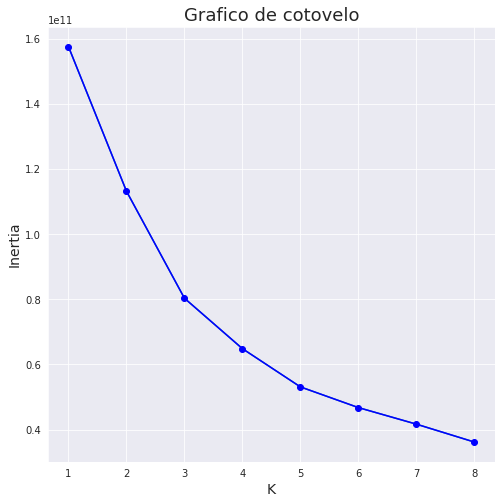

In [ ]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df.drop("Region", axis=1)
y = df.Region
inertias = []
sizes = range(1,9)

for k in sizes:
  k2 = KMeans(n_clusters=k)
  k2.fit(X)
  inertias.append(k2.inertia_)

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 8))

pd.Series(inertias, index=sizes).plot(ax=ax)
plt.plot(sizes,inertias,'-bo')

ax.set_title('Grafico de cotovelo', loc='center', fontsize=18)
ax.set_xlabel('K', fontsize=14)
ax.set_ylabel('Inertia', fontsize=14)

plt.show()


**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

O gráfico de cotovelo mostra dois pontos de dobra que são o ponto k = 3 e o k = 5, porem a dobra no ponto 3 é mais expressiva e pra esse estudo à utilizarei para fins de analise.

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

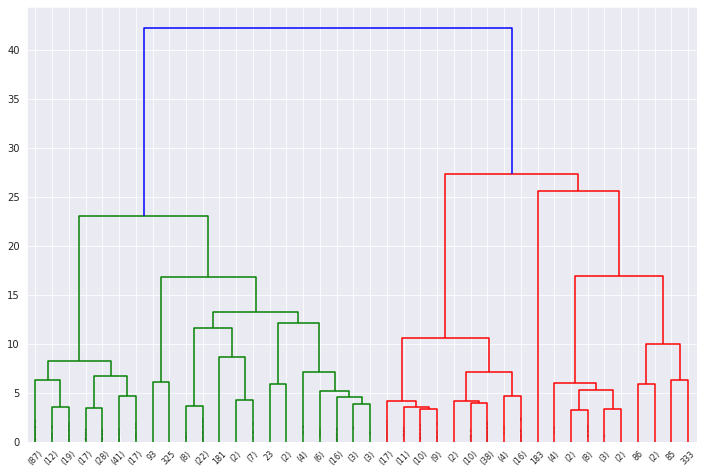

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

X_std = StandardScaler().fit_transform(X)
kmedia = KMeans(n_clusters=3, random_state=10)
kmedia_pred = kmedia.fit_predict(X_std)

plt.figure(figsize = [12,8])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                          truncate_mode = 'lastp', p = 40,
                          show_contracted = True)
plt.show()

In [ ]:
ag = AgglomerativeClustering(n_clusters= 3, affinity='euclidean', linkage='ward')
y_pred = ag.fit_predict(X_std)
y_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

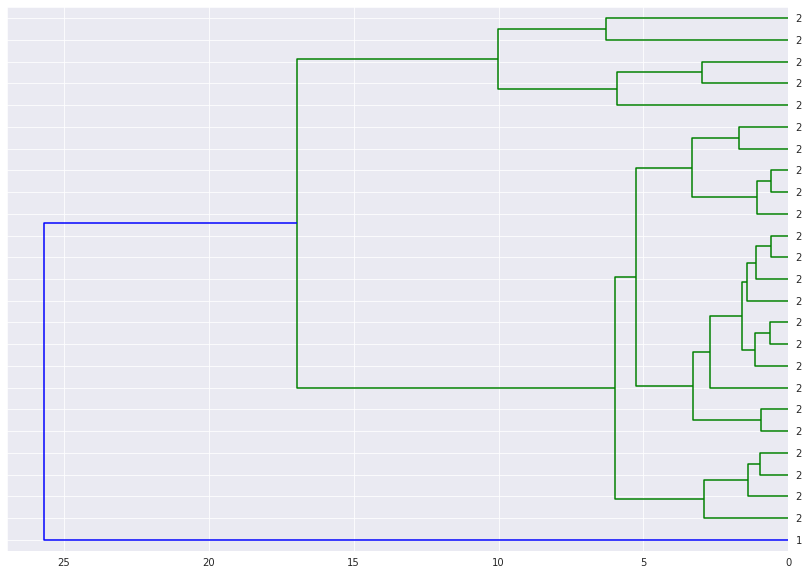

In [ ]:
plt.figure(figsize = [14,10])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==0], method='ward'), 
                          orientation='left', 
                          labels=df[y_pred==0]['Channel'].tolist())
plt.show()

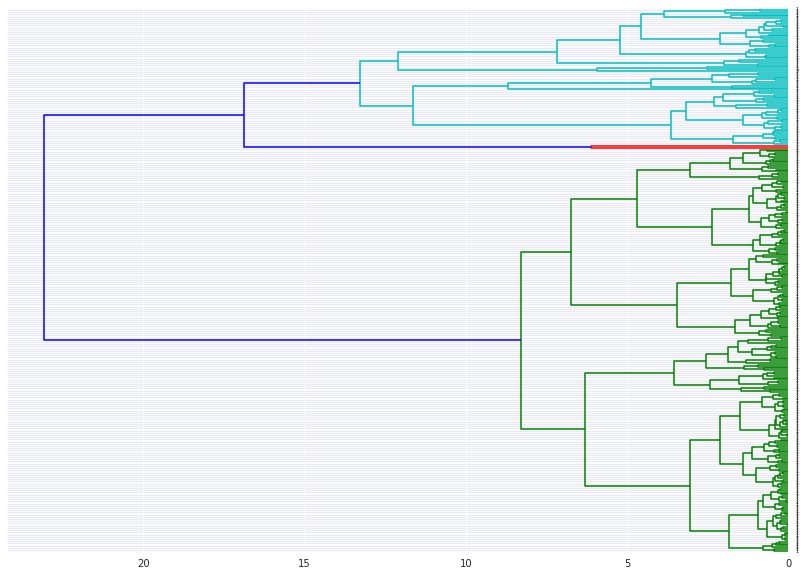

In [ ]:
plt.figure(figsize = [14,10])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==1], method='ward'), 
                          orientation='left', 
                          labels=df[y_pred==1]['Channel'].tolist())
plt.show()

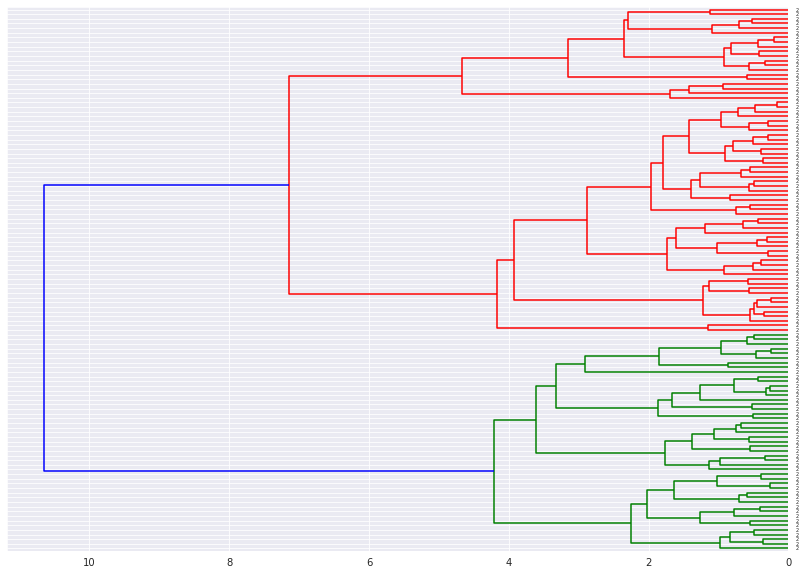

In [ ]:
plt.figure(figsize = [14,10])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==2], method='ward'), 
                          orientation='left', 
                          labels=df[y_pred==2]['Channel'].tolist())
plt.show()

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
df['Cluster'] = y_pred
df['Cluster'] += 1
contador = df['Cluster'].value_counts()
contador



2    298
3    117
1     25
Name: Cluster, dtype: int64

In [ ]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
print('Total de observações do cluster 1: {}'.format(contador[1]))
print('Total de observações do cluster 2: {}'.format(contador[2]))
print('Total de observações do cluster 3: {}'.format(contador[3]))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 25
Total de observações do cluster 2: 298
Total de observações do cluster 3: 117


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
clusterA = df[df['Cluster']== 1]
clusterB = df[df['Cluster'] == 3]


In [ ]:
clusterA.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
28,2,3,4113,20484,25957,1158,8604,5206,1
45,2,3,5181,22044,21531,1740,7353,4985,1
47,2,3,44466,54259,55571,7782,24171,6465,1
49,2,3,4967,21412,28921,1798,13583,1163,1
56,2,3,4098,29892,26866,2616,17740,1340,1


In [ ]:
clusterB.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
4,2,3,22615,5410,7198,3915,1777,5185,3
5,2,3,9413,8259,5126,666,1795,1451,3


Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,1.96,2.520000,11883.480000,24591.320000,34935.000000,3398.480000,16905.680000,4319.520000,1.0
std,0.20,0.770281,11973.794063,16281.757045,17461.116819,7182.599571,8933.301717,9303.559113,0.0
min,1.00,1.000000,85.000000,3737.000000,17645.000000,36.000000,239.000000,37.000000,1.0
25%,2.00,2.000000,4113.000000,14881.000000,25957.000000,869.000000,12408.000000,1102.000000,1.0
50%,2.00,3.000000,8565.000000,21412.000000,28921.000000,1274.000000,14841.000000,1681.000000,1.0
75%,2.00,3.000000,14531.000000,28326.000000,36486.000000,3232.000000,19410.000000,4985.000000,1.0
max,2.00,3.000000,44466.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,1.0


In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,2.0,2.632479,8357.273504,7816.128205,12330.094017,1547.769231,5175.470085,1473.675214,3.0
std,0.0,0.689806,8391.117932,3590.445546,5380.465335,1742.403821,2741.077719,1321.090288,0.0
min,2.0,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,3.0
25%,2.0,3.000000,1989.000000,5403.000000,8584.000000,492.000000,3378.000000,531.000000,3.0
50%,2.0,3.000000,5626.000000,7184.000000,11323.000000,1031.000000,4621.000000,1282.000000,3.0
75%,2.0,3.000000,12126.000000,10473.000000,14982.000000,1840.000000,6830.000000,2124.000000,3.0
max,2.0,3.000000,40721.000000,20655.000000,28986.000000,11559.000000,12638.000000,7844.000000,3.0


Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Sim, o clusterA apresentou valores maiores comparados ao clusterB.

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

O objetivo do projeto é dividir os grupos de vendas, desta forma os rotulos que daria para cada cluster seria:

ClusterA: Vendas de grande porte
clusterB: vendas de menor porte

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Vantagens:
 - Escalonavel e rapido para grandes conjuntos de dados;
 - Adaptavél, podendo ser usado para varios exemplos diferentes;
 - Todos os objetos são atribuidos altomaticamente a um grupo;

Desvantagens:
 - Precisa de especificação prévia para o número de centros de cluster;
 - É sensivel a outliers, não podendo lidar com dados discrepantes e barulhentos;
 - Sensível à escala, conforme o número de dimensões aumenta, sua escalabilidade diminui. 

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações? Se o parametro k for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

RESPOSTA (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Caso o número de cluster for igual ao número de elementos, cadas cluster terá um elemento. Caso o parametro k for igual a 1 siginifica que haverá apenas um cluster com todos os elementos atribuidos a ele.

A inicialização dos centroides afeta o algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Sim, como o algortimo escolhe a posição inicial dos centroides de forma randomica pode acarretar dos centroides iniciarem muito proximo dificultando no processo de criação de grupos concisos, ao definir a inicialização dos centroides pode-se alinha-los de uma melhor forma no conjunto de dados formando grups mais distintos e diminuindo em alguns casos a quantidade de interações.  